In [1]:
import cv2
import numpy as np
from skimage.measure import compare_ssim as ssim

import matplotlib.pyplot as plt
import scipy

In [69]:
def mse(imageA, imageB):
    # the 'Mean Squared Error' between the two images is the
    # sum of the squared difference between the two images;
    # NOTE: the two images must have the same dimension
    err = np.sum((imageA.astype("float") - imageB.astype("float")) ** 2)
    err /= float(imageA.shape[0] * imageA.shape[1])

    # return the MSE, the lower the error, the more "similar"
    # the two images are

def diff_remove_bg(img0, img, img1):
    d1 = diff(img0, img)
    d2 = diff(img, img1)
    return cv2.bitwise_and(d1, d2)

In [3]:
image1 = cv2.imread("images/1.jpg")
image2 = cv2.imread("images/2.jpg")

image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)

absdiff = cv2.absdiff(image1, image2)
cv2.imwrite("images/absdiff.png", absdiff)

diff = cv2.subtract(image1, image2)
result = not np.any(diff)

m = mse(image1, image2)
s = ssim(image1, image2)

In [4]:
print('mse: {}, ssim: {}!"'.format(m, s))

if result:
    print("The images are the same")
else:
    cv2.imwrite("images/diff.png", diff)
    print("The images are different")

mse: None, ssim: 0.9587309874429868!"
The images are different


### Shift

In [20]:
img = image1
rows,cols = img.shape

M = np.float32([[1,0,100],[0,1,50]])
shifted_image = cv2.warpAffine(img, M, (cols,rows))

cv2.imwrite("images/shifted_image.png", shifted_image)

shifted_absdiff = cv2.absdiff(image1, shifted_image)
cv2.imwrite("images/shifted_absdiff.png", shifted_absdiff)

True

## Perspective

### affine transformation

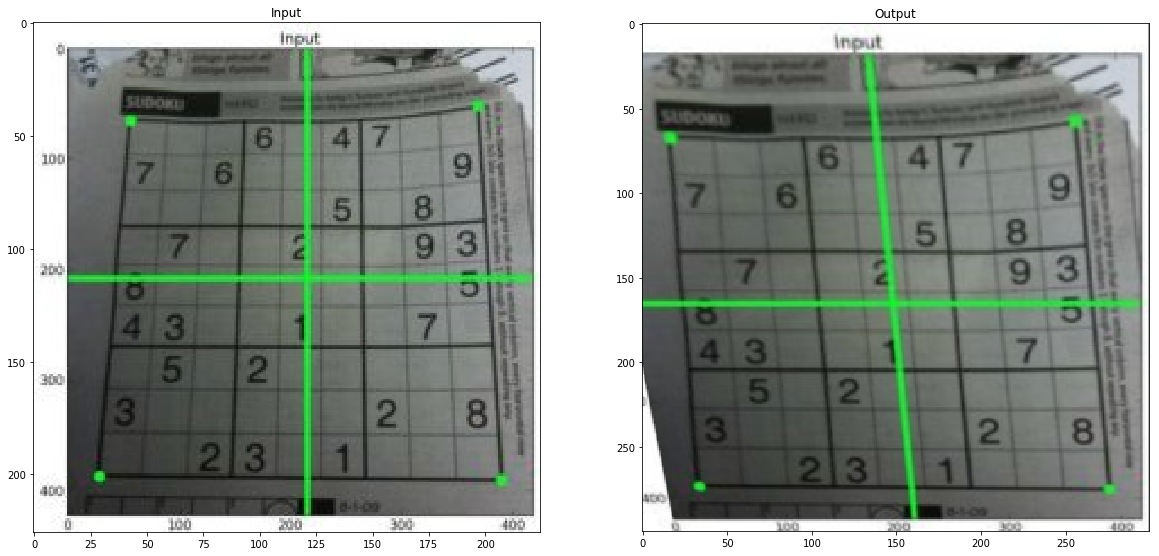

In [56]:
img = cv2.imread('images/perspective/1.jpg')
rows,cols,ch = img.shape
pts1 = np.float32([[40,0],[225,0],[0,225],[225,225]])
pts2 = np.float32([[0,0],[300,0],[0,300],[300,300]])
M = cv2.getPerspectiveTransform(pts1,pts2)
dst = cv2.warpPerspective(img,M,(300,300))
plt.subplot(121),plt.imshow(img),plt.title('Input')
plt.subplot(122),plt.imshow(dst),plt.title('Output')
plt.show()

In [5]:
img1 = cv2.imread('images/perspective/1.jpg')
img2 = cv2.imread('images/perspective/2.jpg')
gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
# sift = cv2.xfeatures2d.SIFT_create()
# kp = sift.detect(gray, None)
brisk = cv2.BRISK_create()
kp1, des1 = brisk.detectAndCompute(img1,None)
kp2, des2 = brisk.detectAndCompute(img2,None)
# cv2.imwrite('sift_keypoints.jpg',img)

In [53]:
# create BFMatcher object
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

# Match descriptors.
matches = bf.match(des1,des2)

# Sort them in the order of their distance.
matches = sorted(matches, key = lambda x:x.distance)

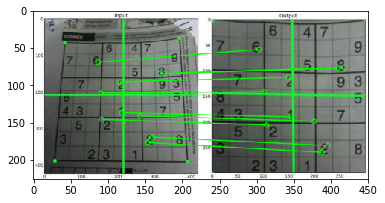

(<matplotlib.image.AxesImage at 0x7f292c94cb70>, None)

In [58]:
# Draw first 10 matches.
draw_params = dict(
                       singlePointColor=None,
                       matchColor=(0, 255, 0),
                       flags=2)
img3 = cv2.drawMatches(img1, kp1, img2, kp2, matches[:10], None, **draw_params)

plt.imshow(img3),plt.show()

## SIFT

In [58]:
img1 = cv2.imread('images/sift/large6.jpg')
img2 = cv2.imread('images/sift/large7.jpg')

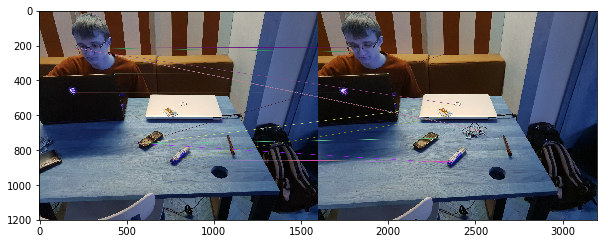

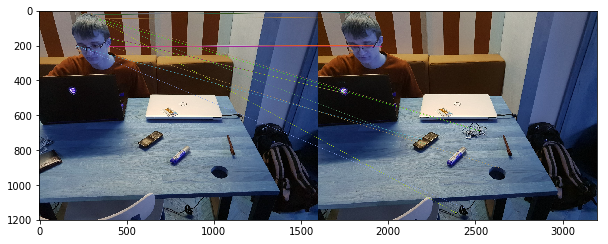

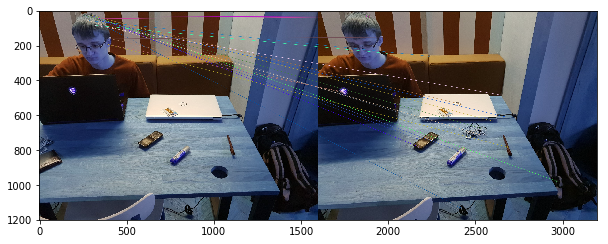

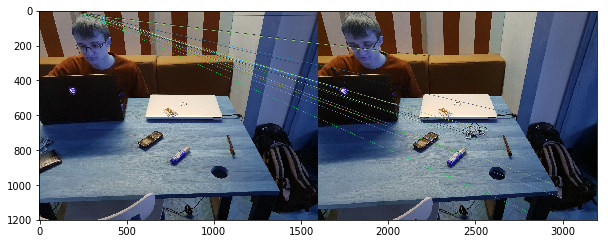

In [61]:
models = []
orb = cv2.ORB_create()
models.append(orb)
kaze = cv2.KAZE_create()
models.append(kaze)
akaze = cv2.AKAZE_create()
models.append(akaze)
brisk = cv2.BRISK_create()
models.append(brisk)

for model in models:
# find the keypoints and descriptors with SIFT
    kp1, des1 = model.detectAndCompute(img1, None)
    kp2, des2 = model.detectAndCompute(img2, None)

# BFMatcher with default params
    bf = cv2.BFMatcher()
    matches = bf.knnMatch(des1, des2, k = 2)

# cv2.drawMatchesKnn expects list of lists as matches.
    img3 = cv2.drawMatchesKnn(img1, kp1, img2, kp2, matches[:10], img3, flags=2)

    plt.rcParams["figure.figsize"] = (10,10)
    plt.imshow(img3)
    plt.show()

### Orb

In [8]:
img1 = cv2.imread('images/sift/large4.jpg')
img2 = cv2.imread('images/sift/large8.jpg')

In [56]:
def my_orb(img1, img2):
    orb = cv2.ORB_create()

# find the keypoints and descriptors with SIFT
    kp1, des1 = orb.detectAndCompute(img1, None)
    kp2, des2 = orb.detectAndCompute(img2, None)

# BFMatcher with default params
    bf = cv2.BFMatcher()
    matches = bf.match(des1, des2)
    matches = sorted(matches, key = lambda x: x.distance)
# cv2.drawMatchesKnn expects list of lists as matches.
    img3 = img1.copy()
    img3 = cv2.drawMatches(img1, kp1, img2, kp2, matches[:50], img3, flags=2)
    return img3


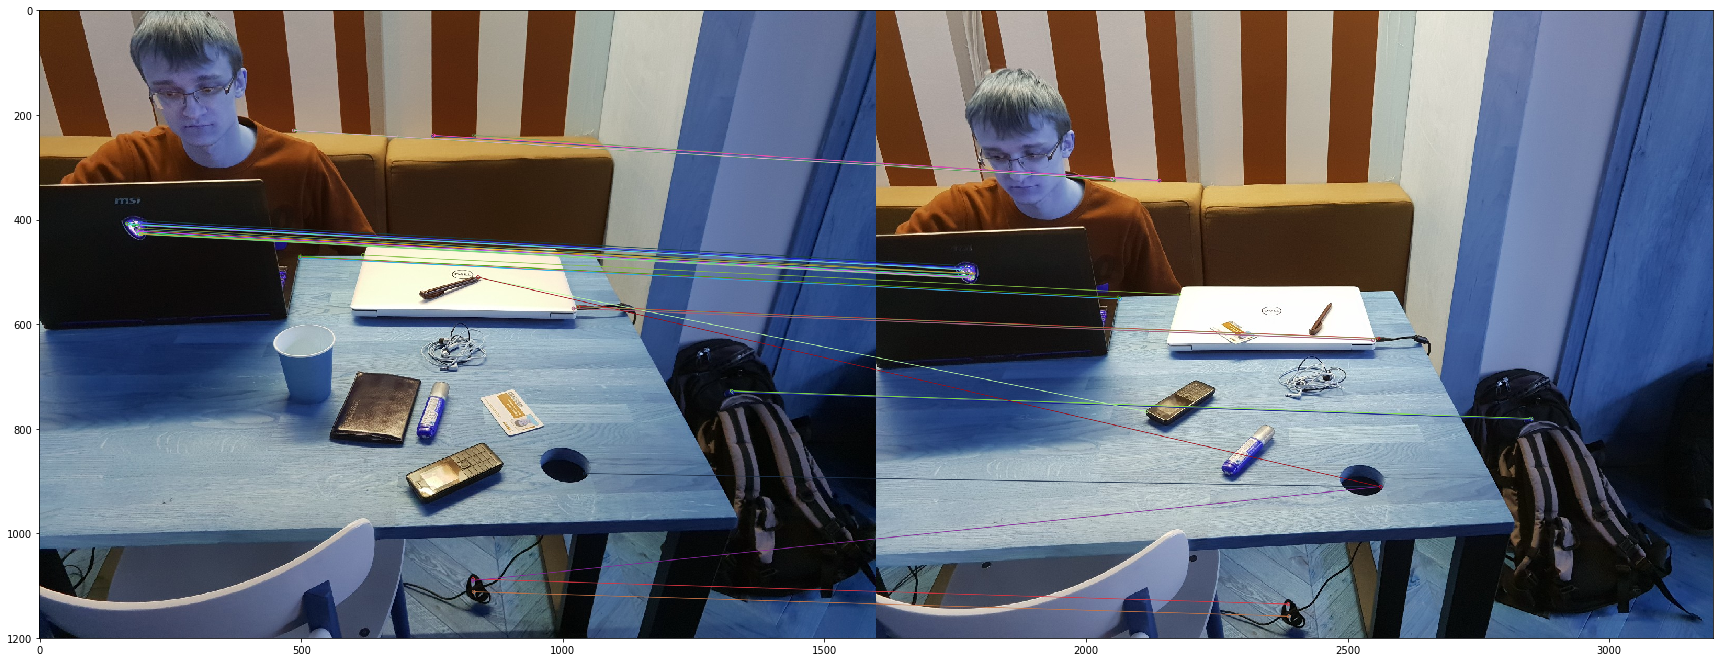

In [57]:
plt.rcParams["figure.figsize"] = (30,30)
plt.imshow(my_orb(img1, img2))
plt.show()

In [36]:
#h is the homography matrix
src_pt = []
for kp in kp1[:5]:
    src_pt.append(np.array([kp.pt[0], kp.pt[1]], dtype=np.float32))
    
dst_pt = []
for kp in kp2[:5]:
    dst_pt.append(np.array([kp.pt[0], kp.pt[1]], dtype=np.float32))
src_pt  
h, status = cv2.findHomography(src_pt, dst_pt)

TypeError: srcPoints is not a numpy array, neither a scalar

In [40]:
for i in range(0, 5):
    print(kp2[i].pt[1])

616.0
916.0
578.0
685.0
573.0


In [41]:
src_pt = np.array([[211.0, 169.0], [767.0, 688.0], [820.0, 624.0]], dtype=np.float32)
dst_pt = np.array([[692.0, 616.0], [899.0, 916.0], [773.0, 578.0]], dtype=np.float32)

In [42]:
h, status = cv2.findHomography(src_pt, dst_pt)

In [71]:
def rotate_mages(im1, im2):
 
  # Convert images to grayscale
  im1Gray = cv2.cvtColor(im1, cv2.COLOR_BGR2GRAY)
  im2Gray = cv2.cvtColor(im2, cv2.COLOR_BGR2GRAY)
   
  # Detect ORB features and compute descriptors.
  orb = cv2.ORB_create(500)
  keypoints1, descriptors1 = orb.detectAndCompute(im1Gray, None)
  keypoints2, descriptors2 = orb.detectAndCompute(im2Gray, None)
   
  # Match features.
  matcher = cv2.DescriptorMatcher_create(cv2.DESCRIPTOR_MATCHER_BRUTEFORCE_HAMMING)
  matches = matcher.match(descriptors1, descriptors2, None)
   
  # Sort matches by score
  matches.sort(key=lambda x: x.distance, reverse=False)
 
  # best 10%
  numGoodMatches = int(len(matches) * 0.1)
  matches = matches[:numGoodMatches]
   
  # Extract location of good matches
  points1 = np.zeros((len(matches), 2), dtype=np.float32)
  points2 = np.zeros((len(matches), 2), dtype=np.float32)
 
  for i, match in enumerate(matches):
    points1[i, :] = keypoints1[match.queryIdx].pt
    points2[i, :] = keypoints2[match.trainIdx].pt
   
  # Find homography
  h, mask = cv2.findHomography(points1, points2, cv2.RANSAC)
 
  # Use homography
  height, width, channels = im2.shape
  rotated_im = cv2.warpPerspective(im1, h, (width, height))
   
  return rotated_im, h

In [72]:
img1 = cv2.imread('images/sift/large4.jpg')
img2 = cv2.imread('images/sift/large8.jpg')

In [73]:
rotated_im, h = alignImages(img1, img2)

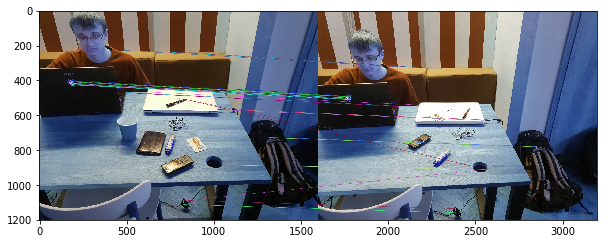

In [74]:
plt.rcParams["figure.figsize"] = (10,10)
plt.imshow(my_orb(img1, img2))
plt.show()

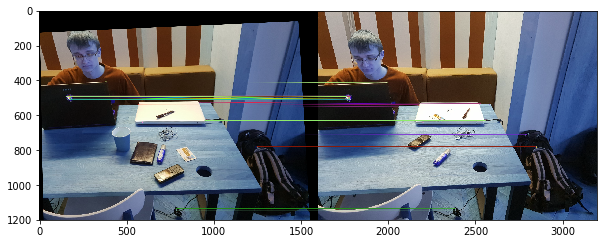

In [75]:
plt.imshow(my_orb(rotated_im, img2))
plt.show()

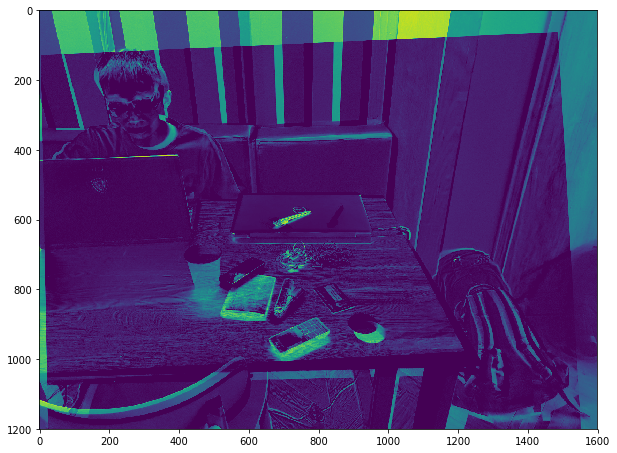

In [81]:
# rotated_im = cv2.cvtColor(rotated_im, cv2.COLOR_BGR2GRAY)
# img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
subtracted = cv2.subtract(img2, rotated_im)

plt.imshow(subtracted)
plt.show()